<a href="https://colab.research.google.com/github/askot19/Analise_de_dados/blob/main/Projetos%20de%20Ci%C3%AAncia%20de%20Dados%20com%20Python/Cap%C3%ADtulo%202/at201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## **Data Scientist & Analyst**

*by [Paulo Henrique de Melo Ferreira](https://www.linkedin.com/in/paulo-henrique-ferreira-20151374/)*

---

<p style="text-align: justify;">

Este notebook visa aprofundar meus conhecimentos práticos em Ciência de Dados. Meu objetivo aqui é implementar o que já conheço da linguagem Python e desenvolver projetos completos acerca da área. Como bibliografia básica utlizarei o **Projetos de Ciência de Dados com Python - Stephen Klosterman**, que visa tratar dados desde o tipo de a análise mais simples (exploratória de dados) até aplicações envolvendo modelos preditivos e Machine Learning. As ferramentas que utilizarei serão principalmente o **Colaboratory do Google** e o **Jupyter Notebook - Anaconda**. O intuito aqui é consumir toda a literatura e me inserir do dia-a-dia de um profissional de dados, atuando tanto como Cientista quanto como Analista de Dados. Pretendo me tornar um profissional mais qualificado após estes desenvolvimentos.
</p>

---

# 2. Introduction to Scikit-Learn and Model Evaluation
#### Objetivos

Neste segundo capítulo serão tratados os primeiros passos com Machine Learning e Validação de Modelos. O intuito é ter o primeiro contato com os modelos preditivos mais simples e caminhar para o seu entendimento com uma aplicação prática. Esse trabalho será desenvolvido na plataforma Colaboratory do Google.

## Características do Dataset

* `ID`: Código de identificação da conta
* `LIMIT_BAL`: Valor do Crédito fornecido (em novos dólares taiwaneses (NT)) inclusive o crédito do consumidor individual e familiar (complementar).
* `SEX`: Gênero (1 = masculino; 2 = feminino).
* `EDUCATION`: Instrução (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros).
* `MARRIAGE`: Estado civil (1 = casado; 2 = solteiro; 3 = outros).
* `AGE`: Idade (ano).
* `PAY_1-PAY_6`: Registro de pagamentos passados. Pagamentos mensais passados, registrados de setembro a abril. Ex.: PAY_1 representa o status de reembolso em setembro; PAY_2 representa o status de reembolso em agosto, e a assim por diante. Os registros são armazenados da seguinte maneira -1 = pagamento pontual; 1 = atraso de um mês de pagamento; 2 = atraso de dois meses de pagamento até chegar em 9 = atraso de nove meses ou mais no pagamento.
* `BILL_AMT1-BILL_AMT6`: Valor da fatura (em novos dólares taiwaneses). BILL_ATM1 representa o valor da fatura em setembro; BILL_AMT2 representa o valor da fatura em agosto; e assim por diante até BILL_AMT6, que representa o valor da fatura em abril.
* `PAY_AMT1-PAY_AMT6`: Valor de pagamentos anteriores (novos dólares taiwaneses). PAY_AMT1 representa o valor pago em setembro; PAY_AMT2 representa o valor pago em agosto; e assim por diante até PAY_AMT6, que representa o valor pago em abril.


In [1]:
# Carregando pacotes necessários para a análise de dados
import pandas as pd #Manipulação de dados
import numpy as np #Computação numérica
import matplotlib.pyplot as plt #Pacote de gráficos
#Renderização de gráficos
%matplotlib inline
import matplotlib as mpl #Adiciona funcionalidades gráficas
mpl.rcParams['figure.dpi'] = 400 #Alta resolução

In [2]:
df = pd.read_csv('https://github.com/askot19/Analise_de_dados/raw/main/Projetos%20de%20Ci%C3%AAncia%20de%20Dados%20com%20Python/Cap%C3%ADtulo%201/Chapter_1_cleaned_data.csv')

# ACTIVITY 2.01: PERFORMING LOGISTIC REGRESSION WITH A NEW FEATURE AND CREATING A PRECISION-RECALL CURVE

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, random_state=24)

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [5]:
from sklearn.linear_model import LogisticRegression

lr_mod = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [6]:
lr_mod.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [7]:
y_pred= lr_mod.predict(X_test)

In [8]:
y_pred_proba = lr_mod.predict_proba(X_test)

In [9]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606566])

Text(0, 0.5, 'Number of samples')

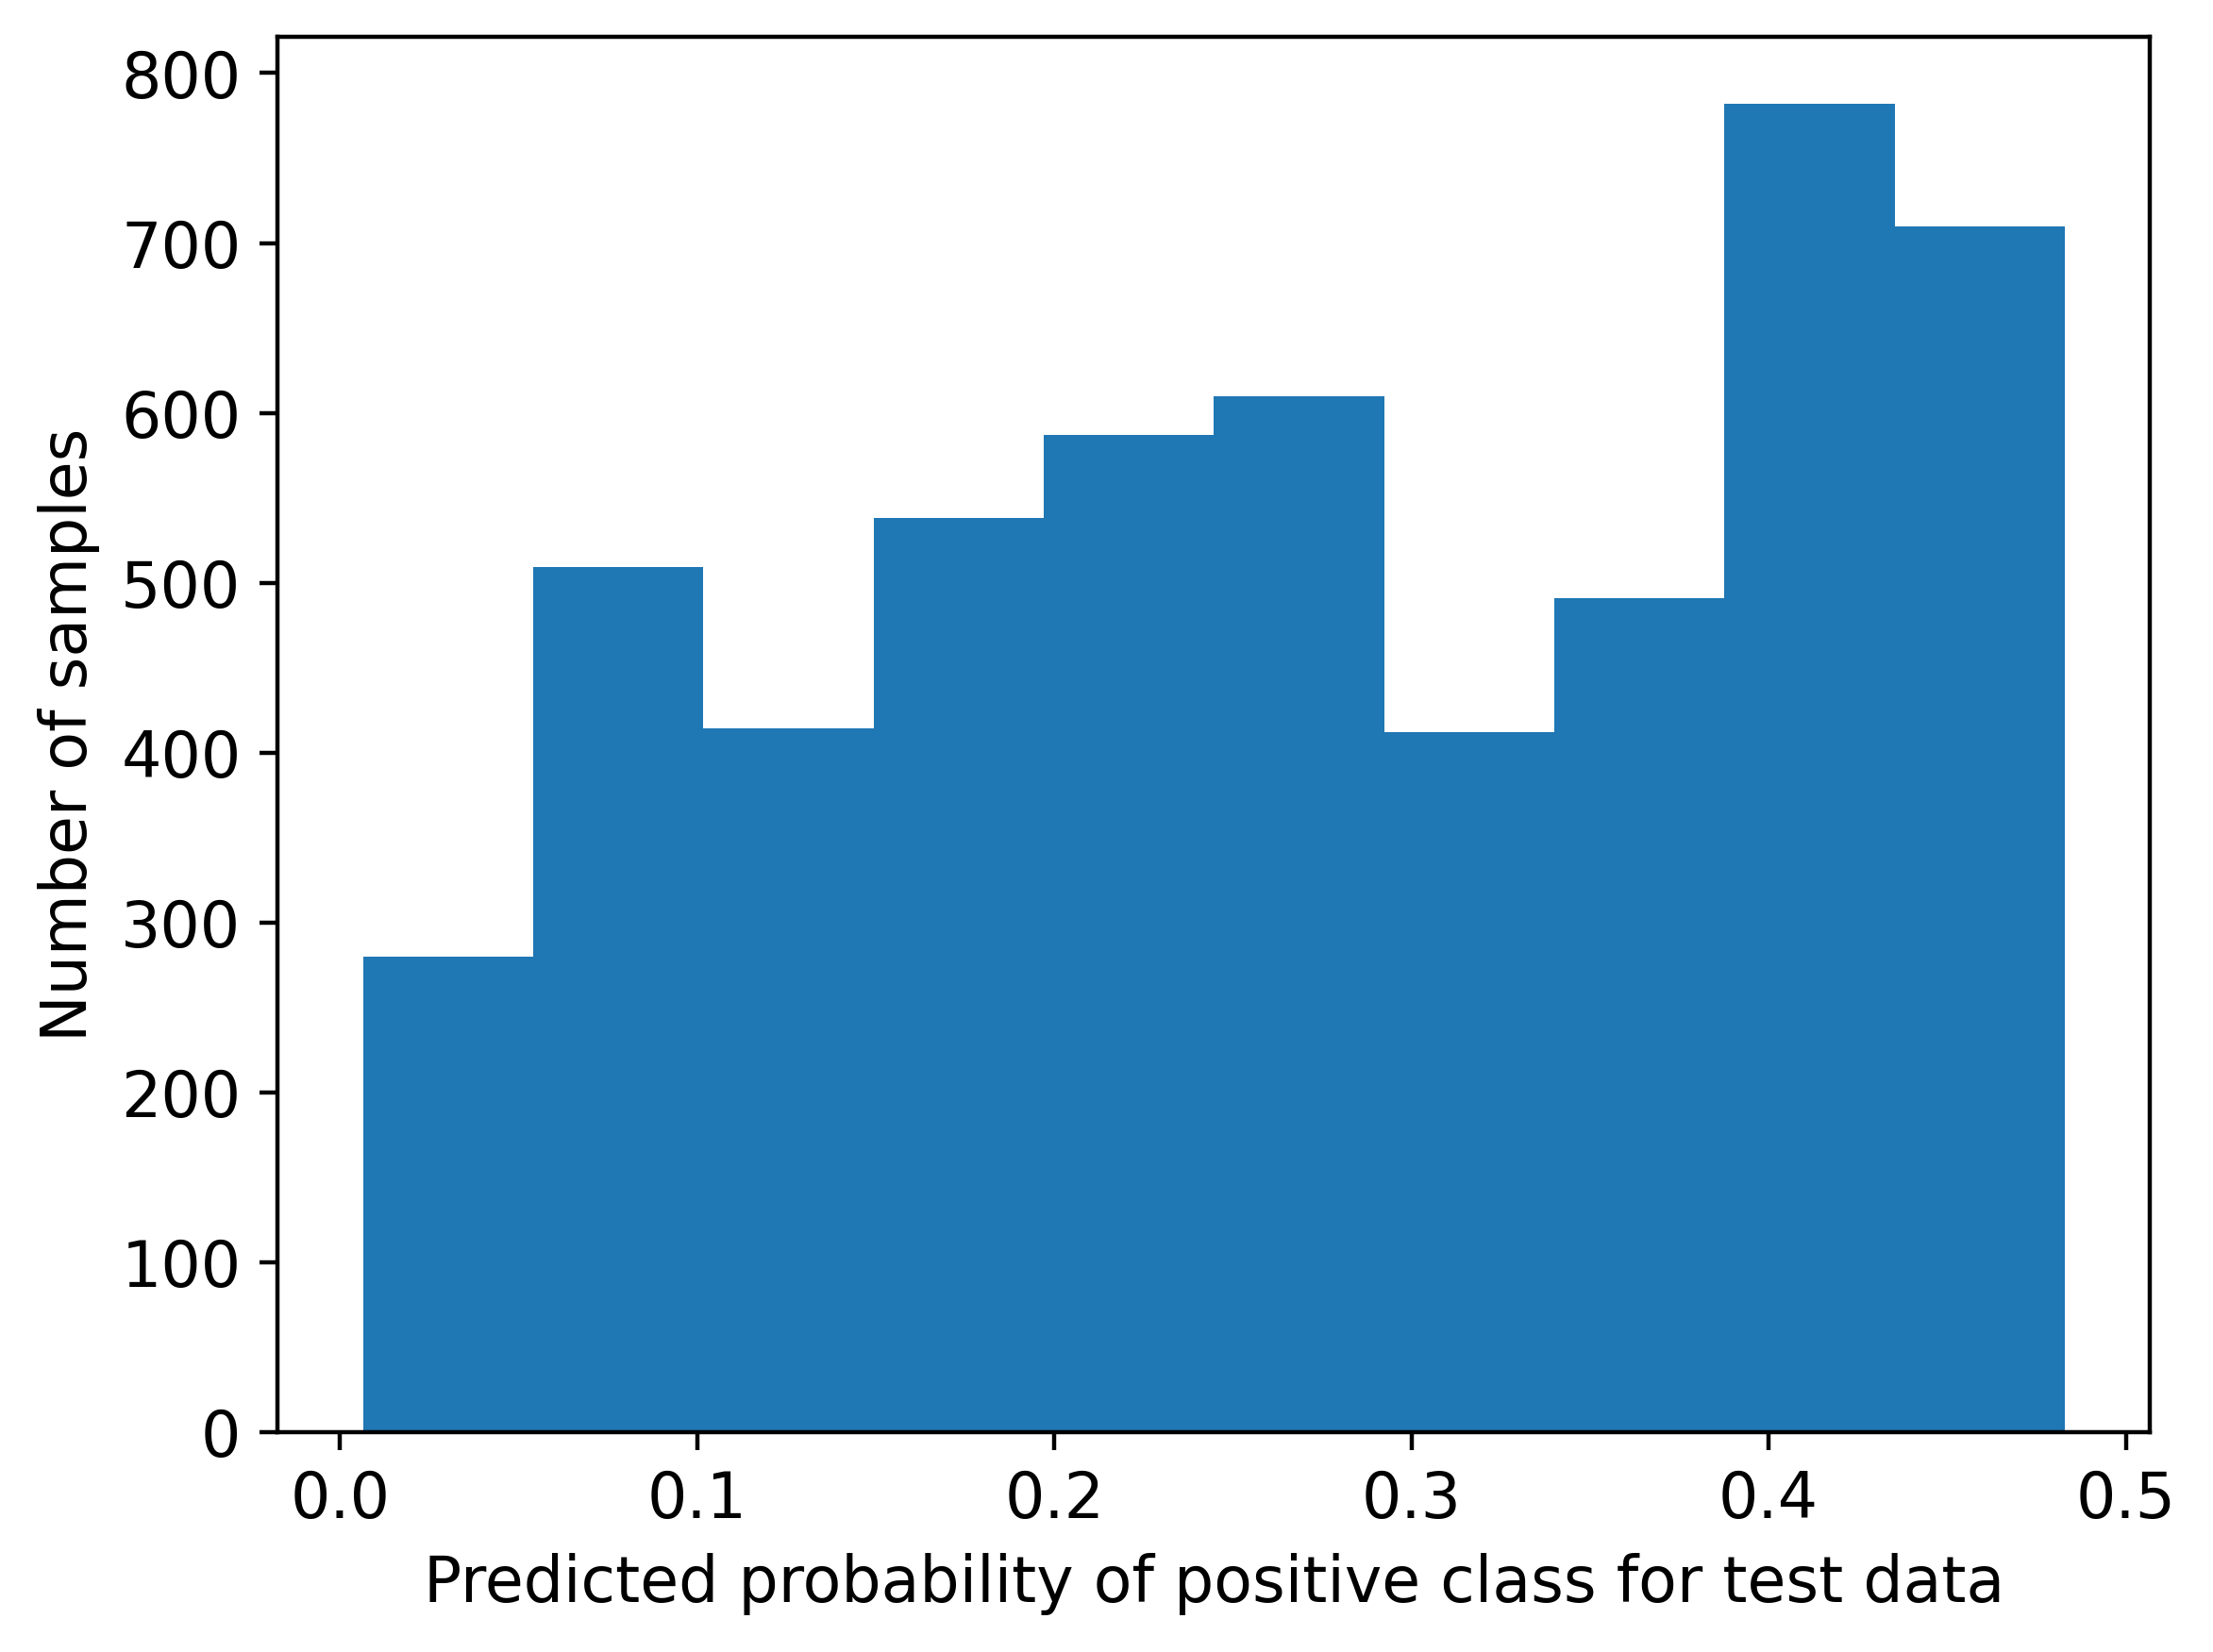

In [11]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for test data')
plt.ylabel('Number of samples')

In [14]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

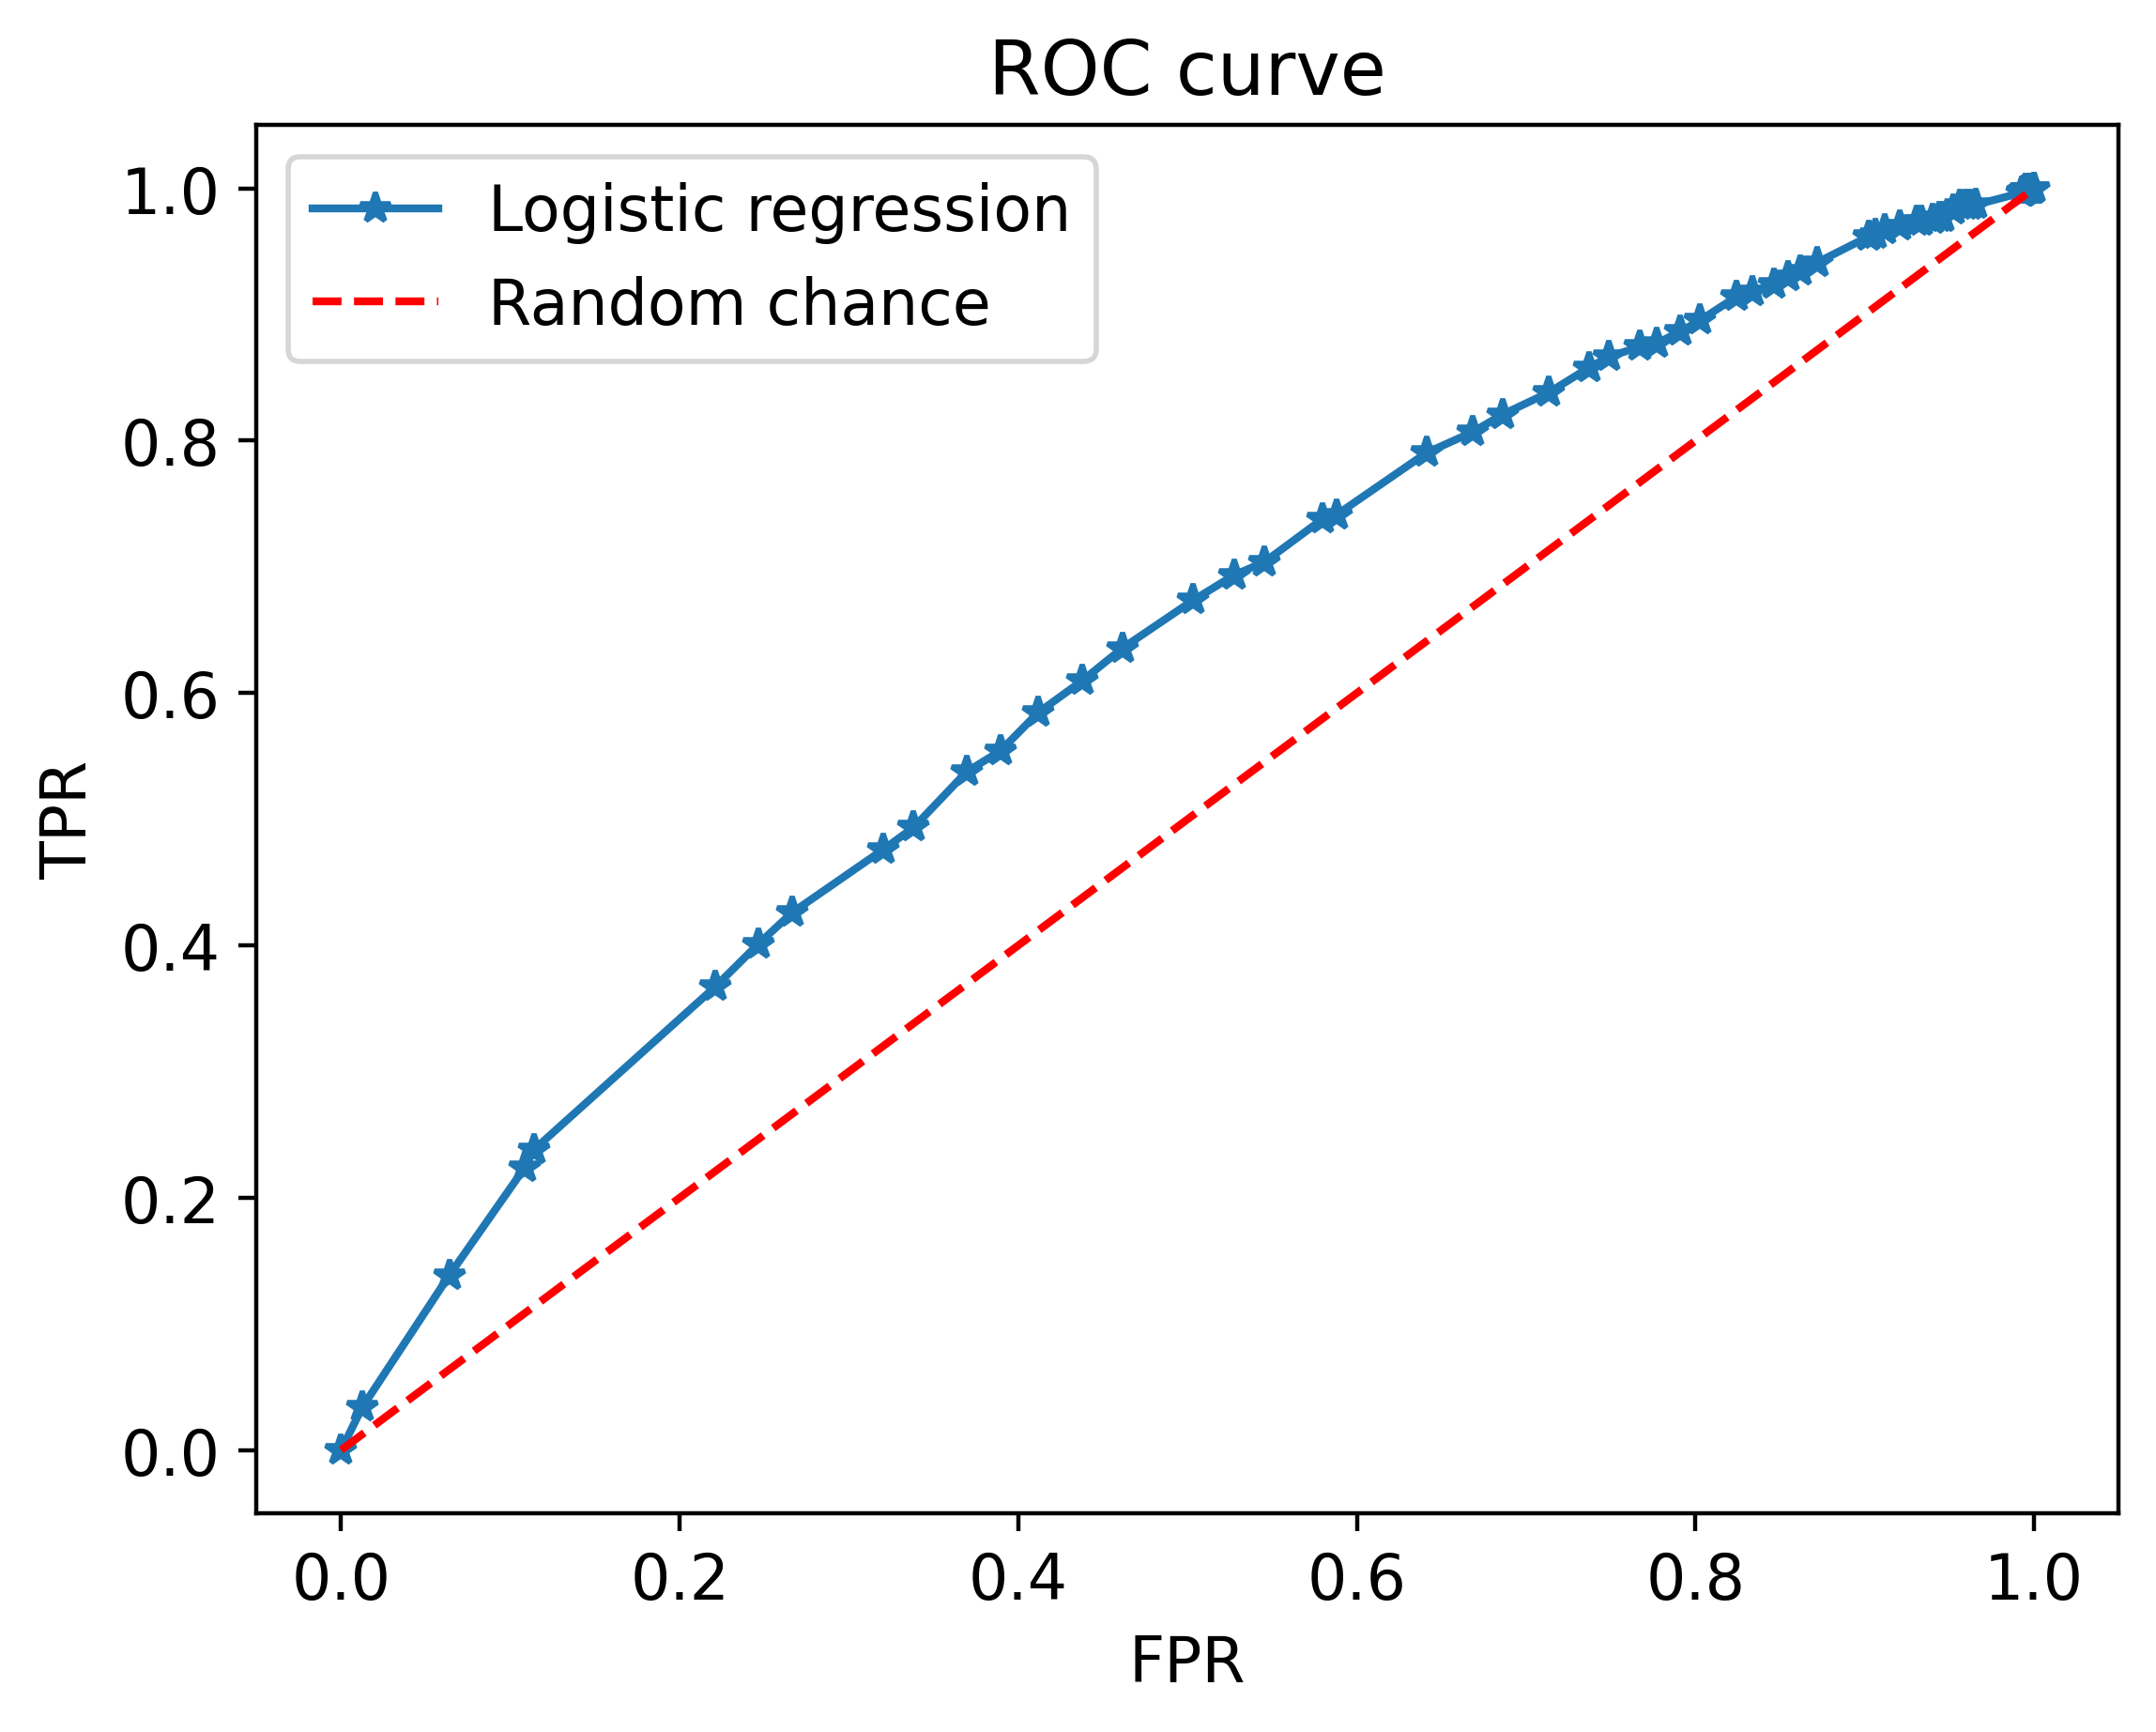

In [15]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1],[0,1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [16]:
thresholds

array([1.48298465, 0.48298465, 0.46600867, 0.44911106, 0.4323301 ,
       0.415703  , 0.3992656 , 0.38305207, 0.3670946 , 0.35142324,
       0.33606566, 0.321047  , 0.30638978, 0.29211383, 0.27823623,
       0.26477132, 0.25173076, 0.23912359, 0.2269563 , 0.21523299,
       0.20395547, 0.19312344, 0.18273464, 0.17278502, 0.16326891,
       0.15417922, 0.14550758, 0.13724452, 0.12937966, 0.12190182,
       0.11479918, 0.10805946, 0.10166997, 0.09561779, 0.08988983,
       0.08447295, 0.07935404, 0.07452008, 0.0699582 , 0.06565578,
       0.06160044, 0.05778008, 0.05418298, 0.05079775, 0.04761337,
       0.04461922, 0.0418051 , 0.03916119, 0.03667808, 0.0343468 ,
       0.03215875, 0.03010574, 0.02817998, 0.02637405, 0.02468092,
       0.0230939 , 0.02021324, 0.01890793, 0.01654057, 0.01546869,
       0.01446524, 0.01033455, 0.00844134, 0.0078901 , 0.00644178])

In [17]:
metrics.roc_auc_score(y_test, pos_proba)

0.6201990844642832